<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week2%E4%BD%9C%E6%A5%AD_%E9%87%91%E8%9E%8D%E5%B8%82%E5%A0%B4%E6%A6%82%E8%BF%B0%E8%88%87%E8%B3%87%E6%96%99%E6%94%B6%E9%9B%86%E3%80%81%E9%A0%90%E8%99%95%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 股市資料蒐集、爬蟲



## 資料爬蟲

## 取得證交所資料
1. 進入證交所網址：https://www.twse.com.tw/zh/index.html
2. 使用開發者模式取得請求資料網址

### 1️⃣ 匯入套件

In [1]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

### 2️⃣ 取得證交所上市公司個股日成交資訊

In [77]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20240923


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"47,059,599","4,825,879,416",95.60,104.50,95.60,103.00,+8.00,"22,403"
1,113/09/03,"31,956,910","3,192,762,998",103.50,104.00,97.80,98.00,-5.00,"20,927"
2,113/09/04,"18,582,532","1,737,234,498",92.80,96.50,89.60,91.60,-6.40,"11,996"
3,113/09/05,"23,664,939","2,134,003,056",93.30,94.30,88.00,88.00,-3.60,"15,902"
4,113/09/06,"23,510,562","2,115,888,012",89.10,92.50,87.90,87.90,-0.10,"14,900"
5,113/09/09,"9,534,290","823,986,447",84.20,88.70,84.10,87.20,-0.70,"7,813"
6,113/09/10,"11,633,181","997,527,266",88.50,89.50,83.20,85.20,-2.00,"8,308"
7,113/09/11,"8,240,892","704,237,530",86.70,86.80,84.60,85.60,+0.40,"5,273"
8,113/09/12,"14,215,811","1,291,107,848",87.40,92.50,87.30,90.50,+4.90,"10,449"
9,113/09/13,"7,197,465","651,029,173",90.70,91.70,89.30,90.60,+0.10,"6,985"


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      15 non-null     object
 1   成交股數    15 non-null     object
 2   成交金額    15 non-null     object
 3   開盤價     15 non-null     object
 4   最高價     15 non-null     object
 5   最低價     15 non-null     object
 6   收盤價     15 non-null     object
 7   漲跌價差    15 non-null     object
 8   成交筆數    15 non-null     object
dtypes: object(9)
memory usage: 1.2+ KB


### week2上課後補充：抓取特定某段時間區間 9/10~9/15
為了比較時間區間，必須要把「日期」欄位轉圜為 Pandas 中的 datetime 格式

#### 時間格式轉換def

In [79]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

In [80]:
# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2024/09/10'
end_date = '2024/09/15'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

filtered_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
6,2024-09-10,"11,633,181","997,527,266",88.50,89.50,83.20,85.20,-2.00,"8,308"
7,2024-09-11,"8,240,892","704,237,530",86.70,86.80,84.60,85.60,+0.40,"5,273"
8,2024-09-12,"14,215,811","1,291,107,848",87.40,92.50,87.30,90.50,+4.90,"10,449"
9,2024-09-13,"7,197,465","651,029,173",90.70,91.70,89.30,90.60,+0.10,"6,985"


###2周的可視化

In [39]:
# 安裝 Noto Sans CJK 字體
!apt-get update -qq
!apt-get install -y fonts-noto-cjk -qq


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設置支持中文的字體
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']  # 使用 Noto Sans CJK JP 字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示的問題

# 確認是否成功加載該字體
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "NotoSansCJK" in font:
        print(font)

/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc


In [41]:
# 找到 Noto Sans CJK 的路徑 (假設上一步已經找到)
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"  # 替換為實際路徑

# 設置字體
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]  # 使用加載的字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法顯示的問題


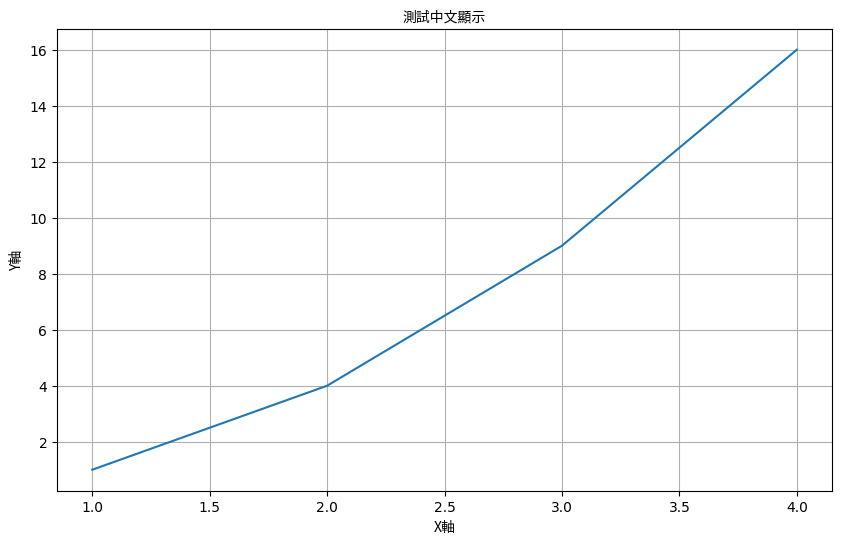

In [43]:
# 測試中文顯示
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title('測試中文顯示', fontproperties=font_prop)
plt.xlabel('X軸', fontproperties=font_prop)
plt.ylabel('Y軸', fontproperties=font_prop)
plt.grid(True)

# 顯示圖表
plt.show()

In [82]:
#確保df 轉成數字
df['收盤價'] = df['收盤價'].apply(pd.to_numeric, errors='coerce')

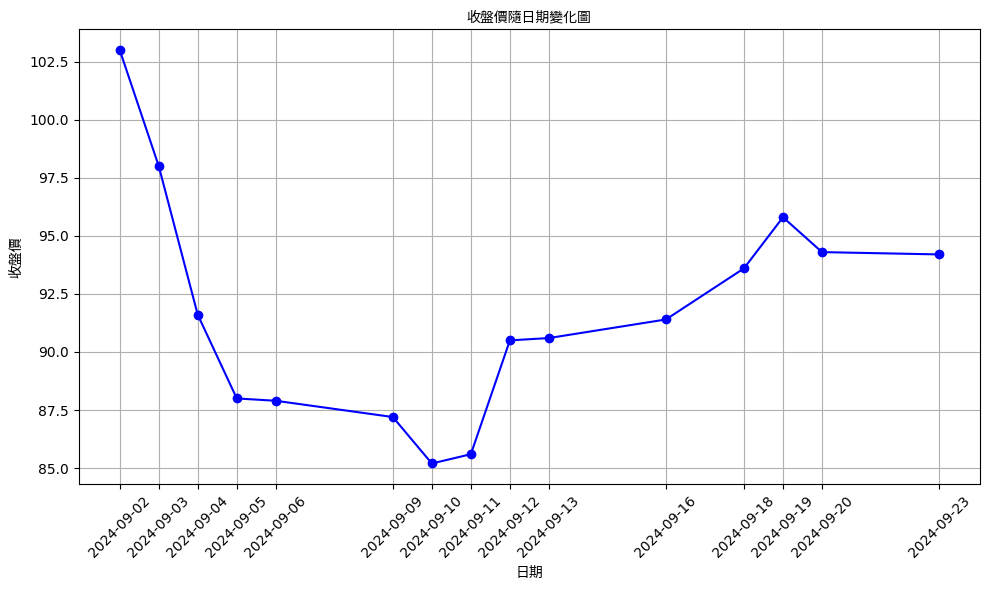

In [83]:

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.plot(df['日期'], df['收盤價'], marker='o', linestyle='-', color='b')
plt.title('收盤價隨日期變化圖',fontproperties=font_prop)
plt.xlabel('日期',fontproperties=font_prop)
plt.ylabel('收盤價',fontproperties=font_prop)
plt.grid(True)
plt.xticks(df['日期'],rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()


### 9/10-9/15的可視化

In [84]:
#確保df 轉成數字
filtered_df['收盤價'] = filtered_df['收盤價'].apply(pd.to_numeric, errors='coerce')

<ipython-input-84-32498374a3a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['收盤價'] = filtered_df['收盤價'].apply(pd.to_numeric, errors='coerce')


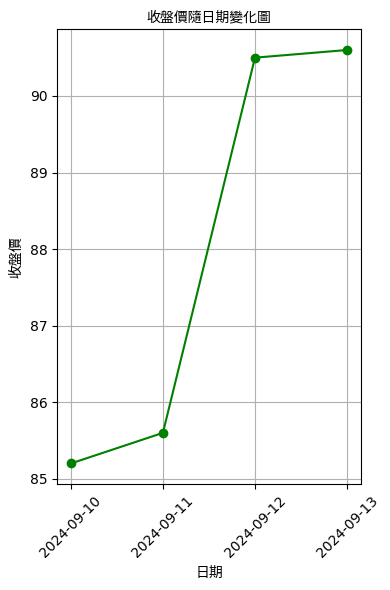

In [85]:
# 繪製圖表

plt.figure(figsize=(len(filtered_df), 6))
plt.plot(filtered_df['日期'], filtered_df['收盤價'], marker='o', linestyle='-', color='g')
plt.title('收盤價隨日期變化圖',fontproperties=font_prop)
plt.xlabel('日期',fontproperties=font_prop)
plt.ylabel('收盤價',fontproperties=font_prop)
plt.grid(True)
plt.xticks(filtered_df['日期'],rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()

### 3️⃣ 取得連續月份資料
以個股本益比為例

In [47]:
# 設定查找時間
date_list = ['20240701', '20240801', '20240901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2486
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2486
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出整個df
print(all_df)

            日期 殖利率(%)  股利年度     本益比 股價淨值比  財報年/季
0   113年07月01日   0.49   112  168.35  6.84  113/1
1   113年07月02日   0.50   112  165.19  6.71  113/1
2   113年07月03日   0.48   112  172.78  7.02  113/1
3   113年07月04日   0.47   112  174.68  7.10  113/1
4   113年07月05日   0.45   112  181.65  7.38  113/1
5   113年07月08日   0.46   112  178.48  7.25  113/1
6   113年07月09日   0.47   112  173.42  7.05  113/1
7   113年07月10日   0.49   112  167.72  6.82  113/1
8   113年07月11日   0.47   112  174.68  7.10  113/1
9   113年07月12日   0.47   112  175.32  7.12  113/1
10  113年07月15日   0.45   112  182.28  7.41  113/1
11  113年07月16日   0.46   112  177.22  7.20  113/1
12  113年07月17日   0.49   112  169.62  6.89  113/1
13  113年07月18日   0.52   112  158.23  6.43  113/1
14  113年07月19日   0.53   112  155.70  6.33  113/1
15  113年07月22日   0.54   112  153.16  6.22  113/1
16  113年07月23日   0.49   112  168.35  6.84  113/1
17  113年07月26日   0.54   112  152.53  6.20  113/1
18  113年07月29日   0.60   112  137.34  5.58  113/1
19  113年07月30日   0.5

#### 本益比的可視化

##### 先處理資料

In [63]:
#民國年月日格式 轉成西元
def convert_minguo_text_to_ad(date_str):
  date_str = date_str.replace("年",'/')
  date_str = date_str.replace("月",'/')
  date_str = date_str.replace("日",'')
  year, month, day = date_str.split('/')
  ad_year = int(year) + 1911  # 將民國年轉換為西元年
  return f"{ad_year}/{month}/{day}"

In [64]:
convert_minguo_text_to_ad("113年09月23日")

'2024/09/23'

In [65]:

# 所有民國日期都轉西元日期 e.g.113年09月10日 -> 2024/09/10
all_df['日期'] = all_df['日期'].apply(convert_minguo_text_to_ad)

In [86]:
#確保df 轉成數字
all_df['本益比'] = all_df['本益比'].apply(pd.to_numeric, errors='coerce')

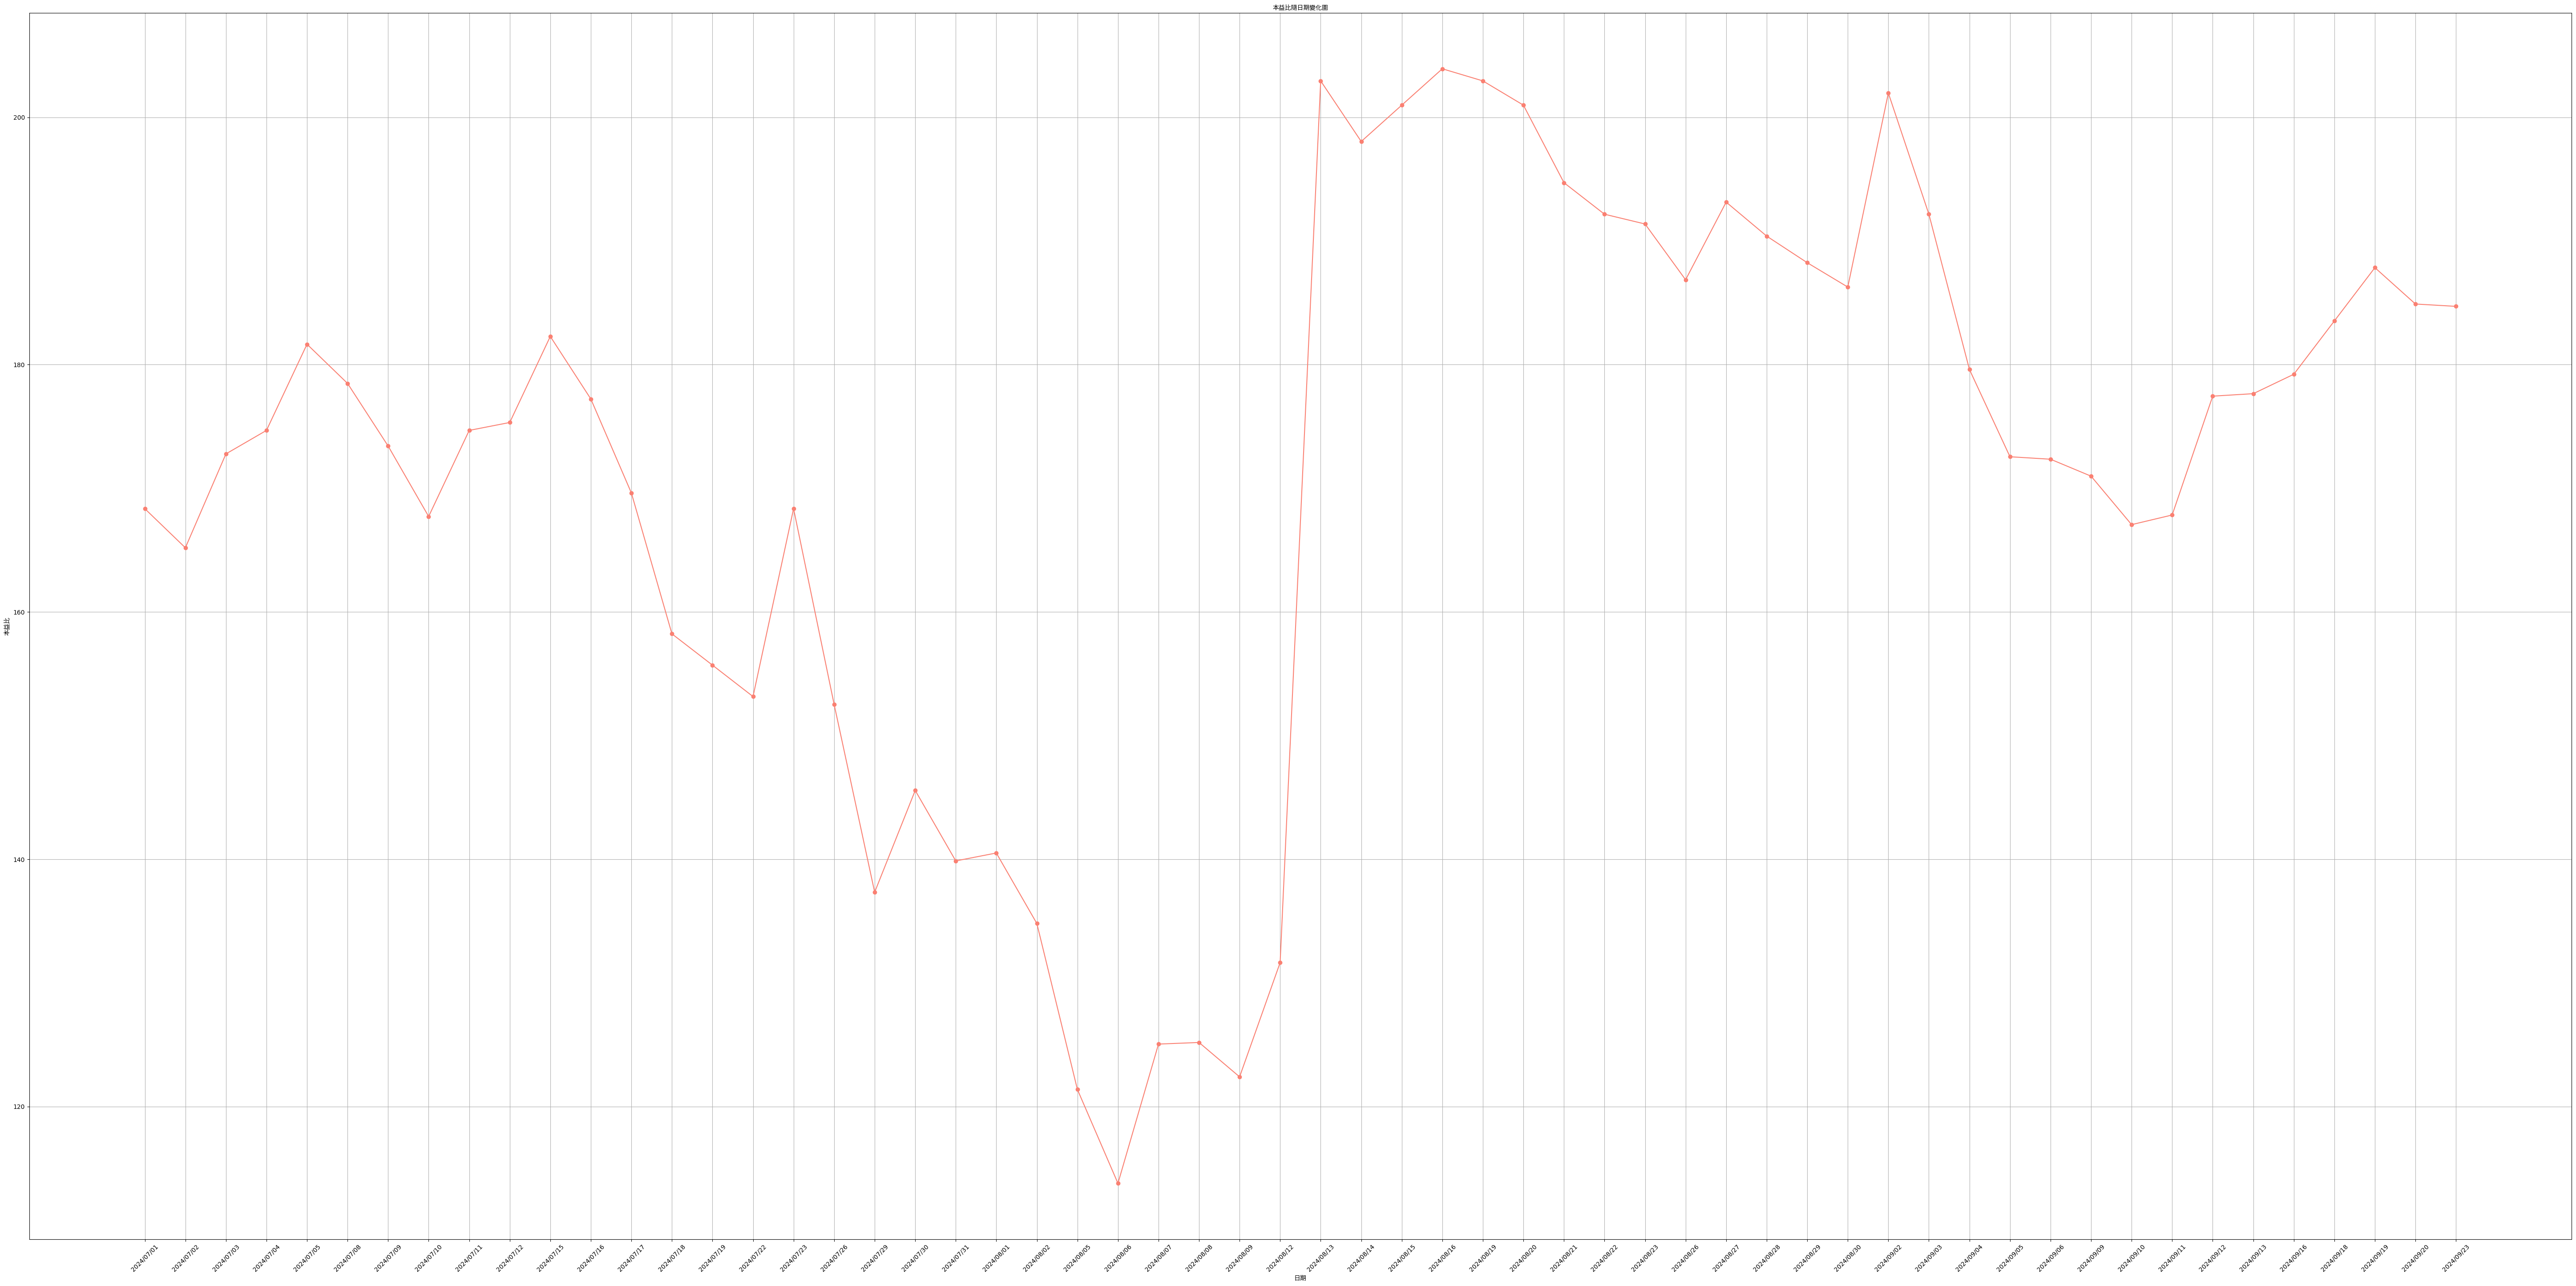

In [87]:
#用matlab.plt可視化資料
# 繪製圖表

plt.figure(figsize=(len(all_df['日期']), len(all_df['日期'])/2))
plt.plot(all_df['日期'], all_df['本益比'], marker='o', linestyle='-', color='salmon')
plt.title('本益比隨日期變化圖',fontproperties=font_prop)
plt.xlabel('日期',fontproperties=font_prop)
plt.ylabel('本益比',fontproperties=font_prop)
plt.grid(True)
plt.xticks(all_df['日期'],rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()

### ⚠️ 如果過度頻繁爬取證交所的資料(約連續50次)會被偵測並封鎖IP，可以搭配time、sleep延遲回應避免被認為是機器人程式。

## 用 BeautifulSoup4 取得 Yahoo 股市資料

###4️⃣ 匯入套件

In [68]:
# 用來處理時間
from datetime import datetime
# 解析網頁內容
from bs4 import BeautifulSoup

###  5️⃣ 取得當日股價

In [70]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    # https://tw.stock.yahoo.com/quote/2330.TW
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "一詮"股票代號
stock_id = '2486'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2024/09/23 14:30,2486,94.2,95.2,96.5,94.2,95.2,6.06,94.3,0.11%,0.10,"6,363","16,690",2.44%


### 6️⃣ 取得季報表資訊


In [71]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2486', 'income-statement']
income-statement


In [121]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
bf_df = url_find(url).transpose()

# 資料處理
bf_df.columns = bf_df.iloc[0]
bf_df = bf_df[1:]
bf_df.insert(0, '年度/季別', bf_df.index)
bf_df.columns.name = None
bf_df.reset_index(drop=True, inplace=True)


#reversr df
bf_df = bf_df[::-1]

# 輸出資料
print(bf_df)

      年度/季別     營業現金流     投資現金流      融資現金流     自由現金流       淨現金流
19  2019 Q3     8,418  -123,184     51,276  -114,766    -99,167
18  2019 Q4    64,368   -66,600    -69,294    -2,232    -84,895
17  2020 Q1   102,572   -84,855     48,153    17,717     61,786
16  2020 Q2   -56,549  -116,485     -3,352  -173,034   -189,088
15  2020 Q3   -15,591  -103,143     49,513  -118,734    -59,130
14  2020 Q4   233,979   -30,456    117,288   203,523    335,921
13  2021 Q1   -36,341   -69,602   -147,854  -105,943   -268,572
12  2021 Q2   199,035  -103,270      5,173    95,765     92,764
11  2021 Q3  -388,641  -119,602    487,863  -508,243    -21,585
10  2021 Q4  -205,223  -163,230    699,847  -368,453    307,652
9   2022 Q1  -128,130  -148,421    250,495  -276,551     10,813
8   2022 Q2   427,866  -109,554     49,067   318,312    354,396
7   2022 Q3   279,933  -259,300   -280,266    20,633   -244,838
6   2022 Q4   448,998   -52,434   -333,448   396,564     43,161
5   2023 Q1   205,942   -47,703   -115,0

In [117]:
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 19 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年度/季別   20 non-null     object
 1   營業現金流   20 non-null     object
 2   投資現金流   20 non-null     object
 3   融資現金流   20 non-null     object
 4   自由現金流   20 non-null     object
 5   淨現金流    20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [122]:
bf_df['淨現金流'] = bf_df['淨現金流'].str.replace(',','')

In [123]:
bf_df['淨現金流']

,淨現金流
19,-99167
18,-84895
17,61786
16,-189088
15,-59130
14,335921
13,-268572
12,92764
11,-21585
10,307652


In [124]:

#確保 bf_df 轉成數字
bf_df['淨現金流'] = bf_df['淨現金流'].apply(pd.to_numeric, errors='coerce')

In [125]:
bf_df['淨現金流']

,淨現金流
19,-99167
18,-84895
17,61786
16,-189088
15,-59130
14,335921
13,-268572
12,92764
11,-21585
10,307652


#### 可視化淨現金流

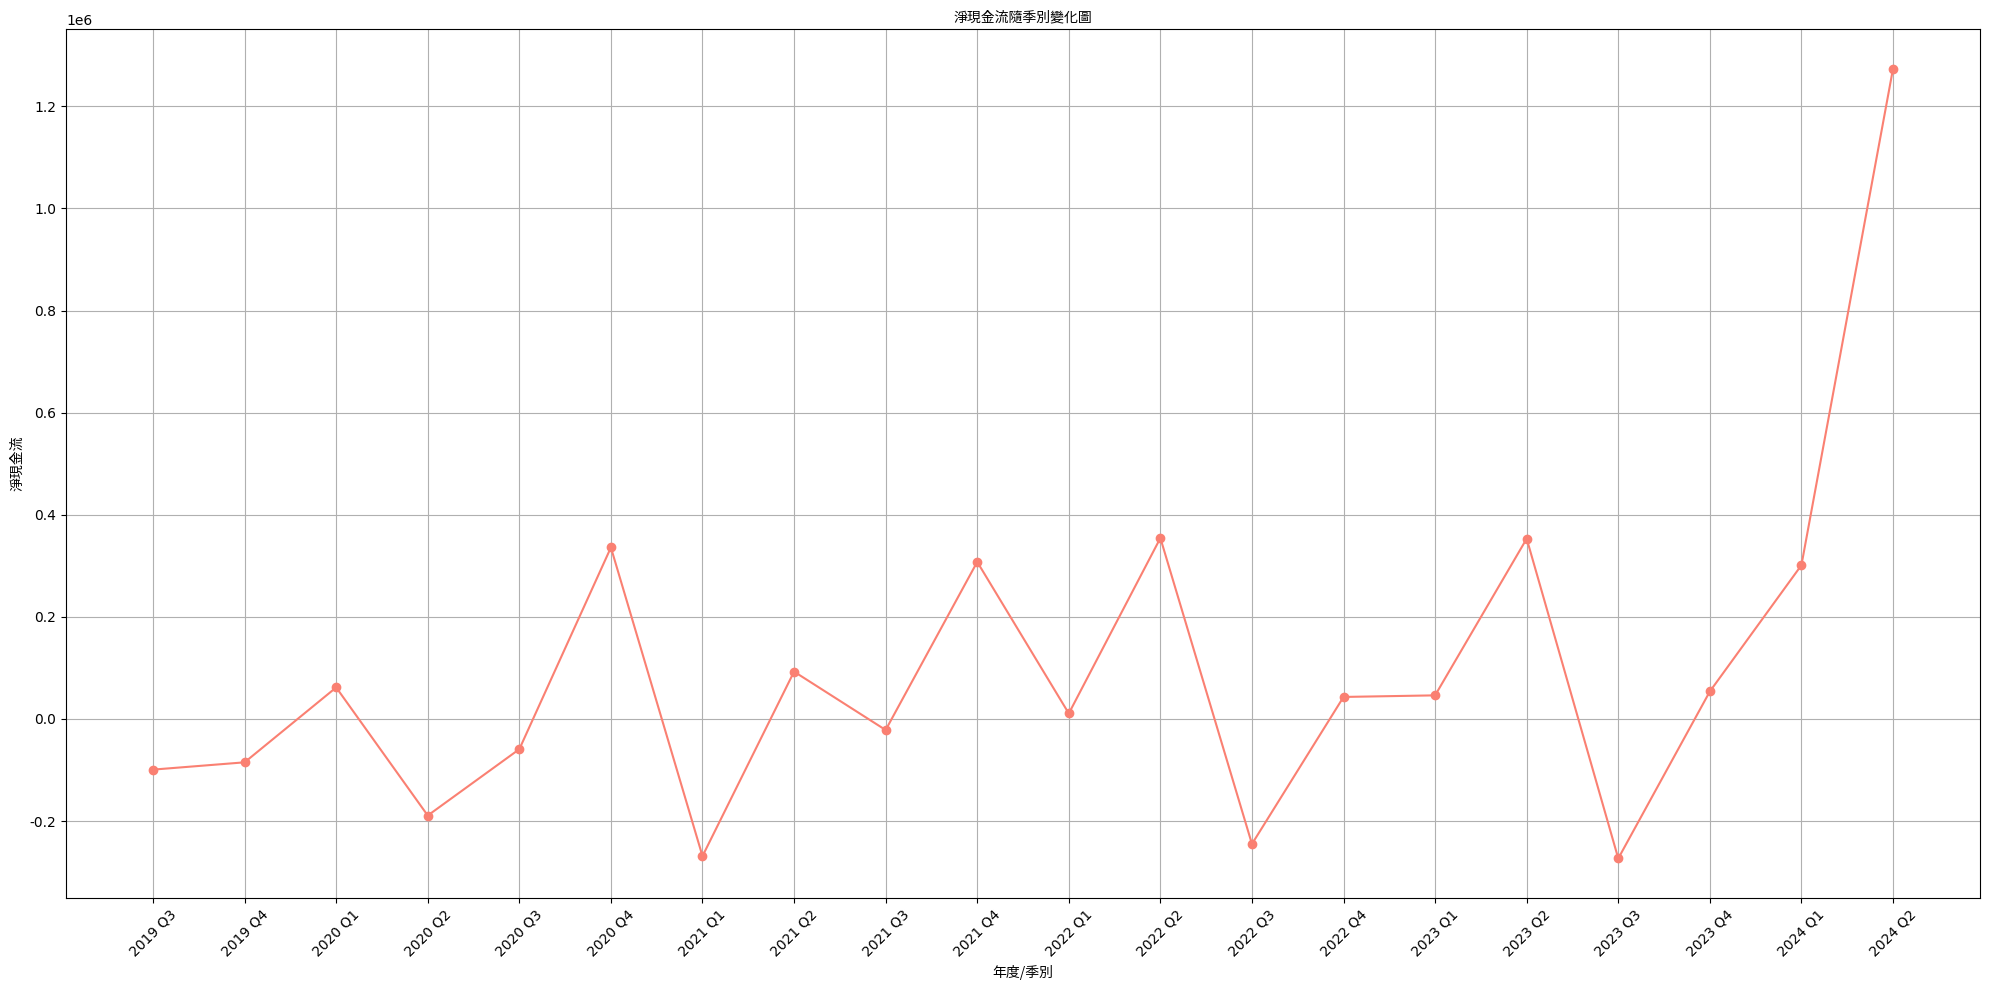

In [127]:
plt.figure(figsize=(len(bf_df['年度/季別']), len(bf_df['年度/季別'])/2))
plt.plot(bf_df['年度/季別'], bf_df['淨現金流'], marker='o', linestyle='-', color='salmon')
plt.title('淨現金流隨季別變化圖',fontproperties=font_prop)
plt.xlabel('年度/季別',fontproperties=font_prop)
plt.ylabel('淨現金流',fontproperties=font_prop)
plt.grid(True)
plt.xticks(bf_df['年度/季別'],rotation=45)
plt.tight_layout()

# 顯示圖表
plt.show()